# Shap Plots for Interpreting Machine Learning Models

Shap demo with iris: https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Iris%20classification%20with%20scikit-learn.html

https://sites.gatech.edu/omscs7641/2024/02/07/introduction-to-classification-model-comparison-methods/

In [8]:
import shap
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
dtc = DecisionTreeClassifier(max_depth=4)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

SHAP plots are built off of SHAP values which are a representation of the contribution of each feature to the difference between the actual and average prediction. These plots can help with a number of different aspects of model comparison and evaluation:

- Feature Impact: Positive shap values indicate model predictions were moved higher by the feature and vice versa for negative features as well as the strength of the impact (larger shap values == higher impact). They can also show the interaction between features to show the combined impacts.

- Debugging: If a change to a model resulted in unanticipated results, the SHAP plot can help look under the hood and see what exactly is driving behavior. 

- Comparison: By placing two plots side by side, it’s possible to see how different design choices in a model can change the feature importance and weights.

https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/decision_plot.html

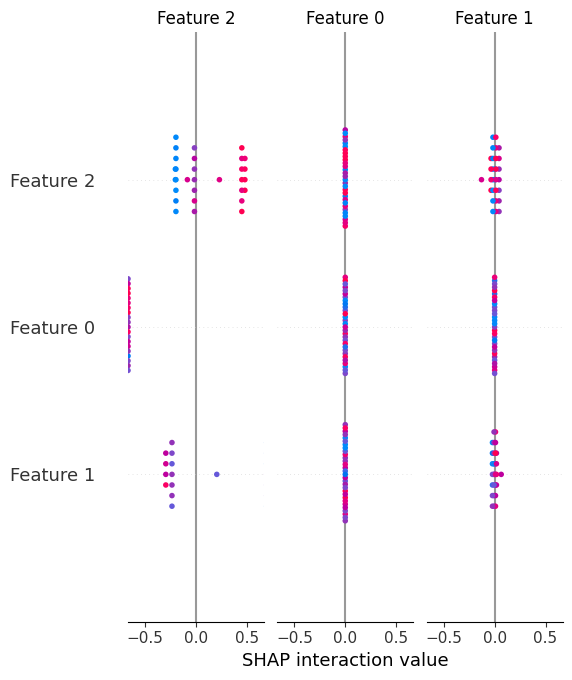

In [10]:
# create shap plot for the model
explainer = shap.TreeExplainer(dtc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")